# DT2470 Lab 02: Teh Machine Learnings

by Bob L. T. Sturm

In this lab you will practice some fundamental concepts of machine learning. In the first part you will work with an artificial dataset. The second part involves a music dataset. There's a lot more to explore, so this lab only scratches the surface!

The lab report you submit should be a testament to your intelligence, as well as a reflection of your willingness to be a part of this module. You are free to use whatever software you want, e.g., python, MATLAB, Processing, C++, etc. But I give tips below in python.

I also include some images so you can confirm whether you are on the right track, or just to have a brief pause to laugh at how far your answer is from being correct.


# Part 1: Basics

In this part, you will explore some basic principles of machine learning. First we are going to synthesize a "toy" dataset, where we know everything about the data. This is the "best case scenario", and can help us understand ML methods and their parameters, as well as debug implementations.

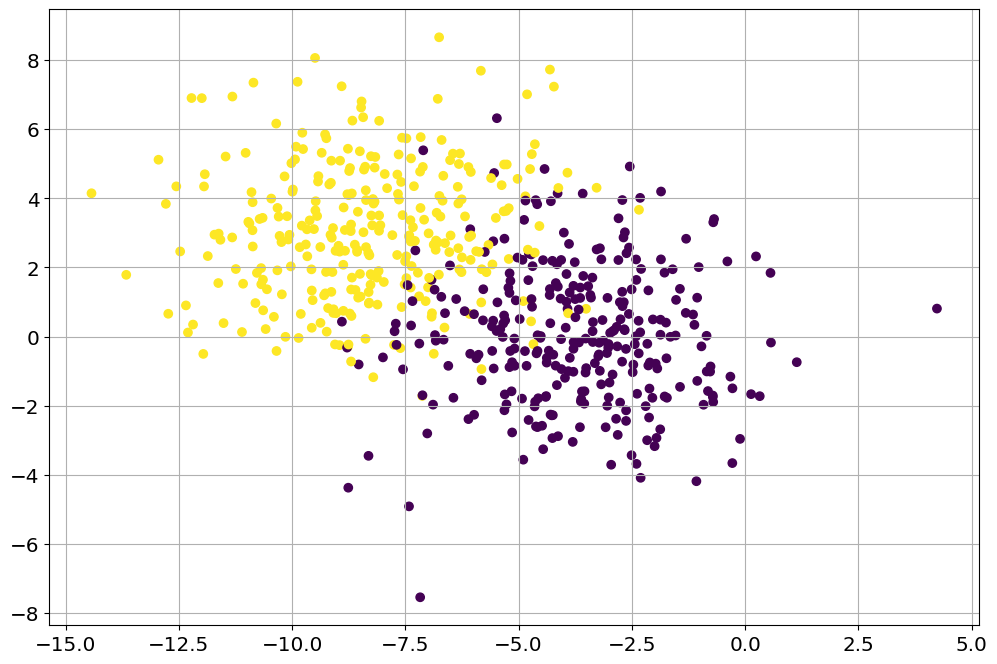

In [1]:
import numpy as np
from sklearn import datasets # see https://scikit-learn.org/stable/datasets/index.html
import matplotlib.pyplot as plt

numClasses = 2 # number of separate classes
numObservations = numClasses*300 # number of total observations
cluster_std = 2 # spread of the classes, larger leads to more confusion

# create a labeled dataset and make a pandas dataframe
X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)

# The following makes the plot look nice
params = {'legend.fontsize': 'x-large','figure.figsize': (12, 8),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# make a scatter plot of the dataset
fig, ax = plt.subplots()
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(); plt.show()

# 1.1
Create a 80/20 train/test split of your data. See [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection) for the function *train_test_split*.

In [2]:
from sklearn.model_selection import train_test_split
# add your code below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
print('The number of train data:',len(X_train))
print('The number of test data:',len(X_test))

The number of train data: 480
The number of test data: 120


# 1.2

Create an instance of a nearest neighbor classifier and train it with your *training* data. See [sklearn.neighbors](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.neighbors) for the appropriate function.

In [3]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
k_classify = KNeighborsClassifier(n_neighbors=10)
k_classify.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

# 1.3 

Plot the decision boundary of your trained classifier. Use the *plot_decision_regions* function in [mlxtend.plotting](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.plotting/#plot_decision_regions). (You will need to install mlxtend.)

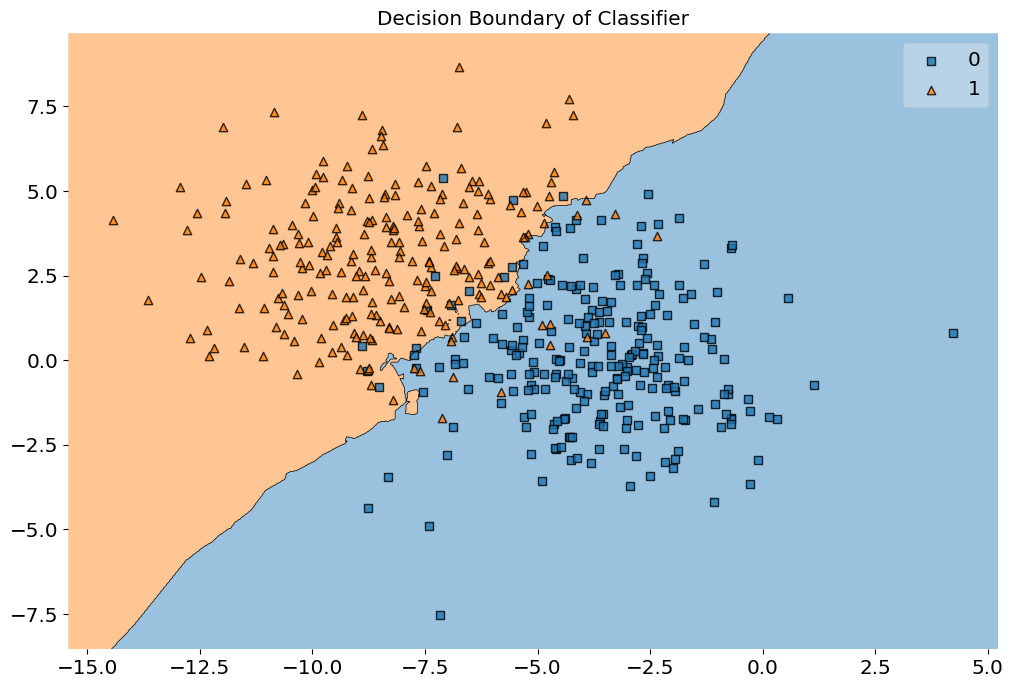

In [4]:
from mlxtend.plotting import plot_decision_regions
# add your code below
plt.figure(1)
plot_decision_regions(X_train, y_train, clf=k_classify)
plt.title('Decision Boundary of Classifier')
plt.show()

# 1.4

Use your classifier to label the hold out set, and print out the predicted labels and true labels. 

In [5]:
# add your code below
y_predict = k_classify.predict(X_test)
print("Predicted Labels:", y_predict)
print("True Labels:", y_test)

Predicted Labels: [1 0 0 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 0 1 1 0
 1 1 1 0 0 0 1 1 0]
True Labels: [1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0
 1 1 0 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 1
 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 1 1 0 0 1 1 0]


# 1.5 

Print the confusion matrix of the results. See [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) for a relevant function.

Confusion Matrix: 
 [[44  5]
 [ 6 65]]


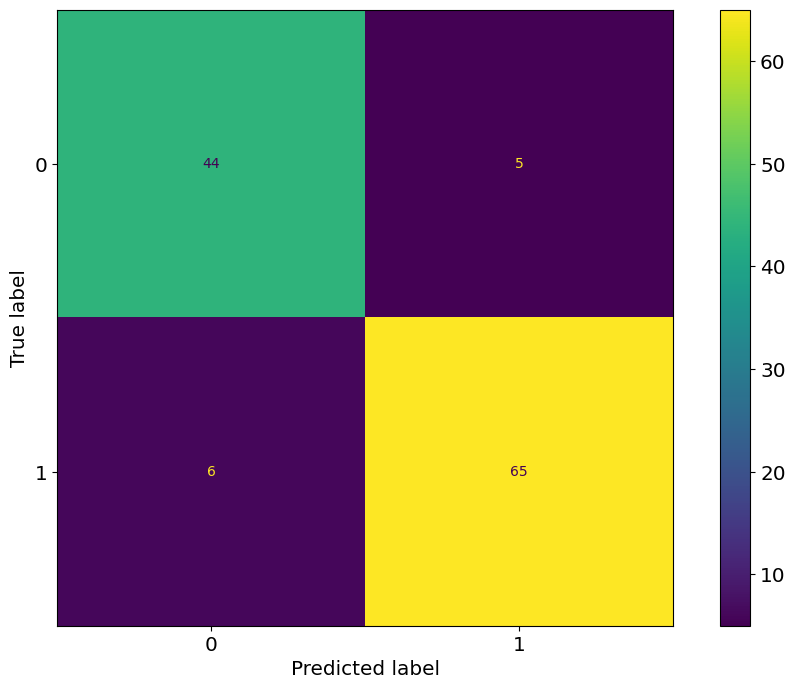

In [6]:
# add your code below
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
conf_mtx = confusion_matrix(y_test, y_predict)   #confusion matrix
print("Confusion Matrix: \n", conf_mtx)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mtx).plot()

# 1.6

Use the *classification_report* function of [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to print out more metrics for your classifier.

In [7]:
from sklearn.metrics import classification_report
# add your code below

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        49
           1       0.93      0.92      0.92        71

    accuracy                           0.91       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.91      0.91      0.91       120



# 1.7 

Now you will explore k nearest neighbor classification with the toy dataset.
Create a 50/30/20 train/validation/test split of your data.

In [8]:
# add your code below
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.4, random_state=42)
print('The number of train data:',len(X_train))
print('The number of validation data:',len(X_val))
print('The number of test data:',len(X_test))

The number of train data: 300
The number of validation data: 180
The number of test data: 120


# 1.8

For k in 1 to 51 by odd integers, train a kNN classifier and compute its accuracy on the training dataset and the validation dataset. Plot these accuracies as a function of k.

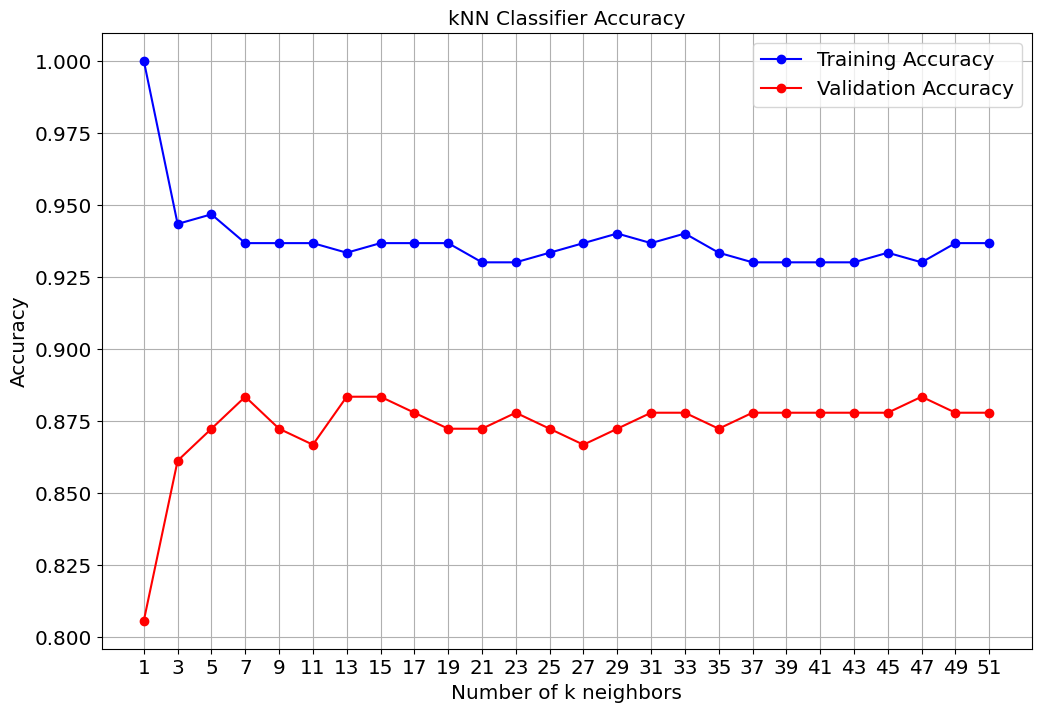

In [9]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train_acc = []
val_acc = []
k_neigh = list(range(1, 52, 2))

for k in k_neigh:
    k_classifier = KNeighborsClassifier(n_neighbors=k)
    k_classifier.fit(X_train, y_train) #train

    train_acc.append(k_classifier.score(X_train, y_train))
    val_acc.append(k_classifier.score(X_val, y_val))
    
#accuracies as a function of k
plt.figure()
plt.plot(k_neigh, train_acc, label='Training Accuracy', color='b', marker='o')
plt.plot(k_neigh, val_acc, label='Validation Accuracy', color='r', marker='o')
plt.title('kNN Classifier Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of k neighbors')
plt.xticks(k_neigh)
plt.legend()
plt.grid(True)
plt.show()

## Generalization, Overfitting, and Underfitting

* If a model is able to make accurate predictions on unseen data: 
    * it is able to **generalize** from the training set to the test set.
* Building a model that is too complex for the amount of information in the data is called overfitting.
* This refers to the complexity of the decision boundary, **NOT** computational complexity.

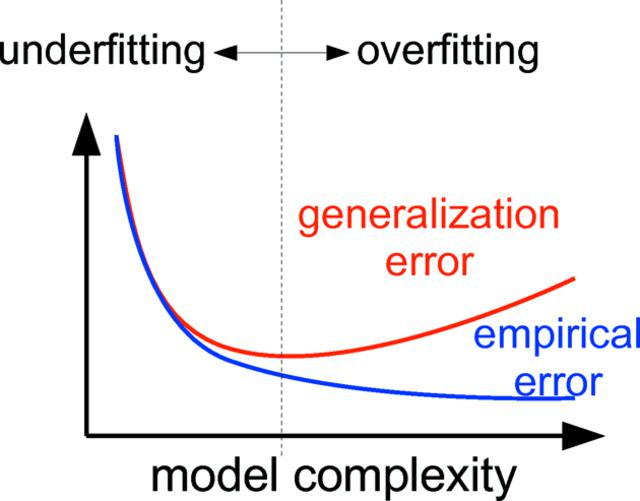

# 1.9

The complexity of KNN models decreases with K. Find the K with the highest validation accuracy, and train a kNN classifier with that K on the training data. Test it on the testing data and print its classification_report. If there are several possible K, choose one by some strategy.

In [10]:
# add your code below
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import numpy as np

k_max = np.argwhere(val_acc == np.max(val_acc)).ravel()[-1]
print(k_max,val_acc[k_max],np.max(val_acc))

kmax_classifier = KNeighborsClassifier(k_max) 
kmax_classifier.fit(X_train, y_train)

y_predict = kmax_classifier.predict(X_test)  #test
report = classification_report(y_test, y_predict)
print("Classification Report for kNN with k =", k_max, "\n",report)

23 0.8833333333333333 0.8833333333333333
Classification Report for kNN with k = 23 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        50
           1       0.96      0.94      0.95        70

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



# 1.10
For this classifier, plot its decision boundary, and compare with the boundary you see in #1.3.

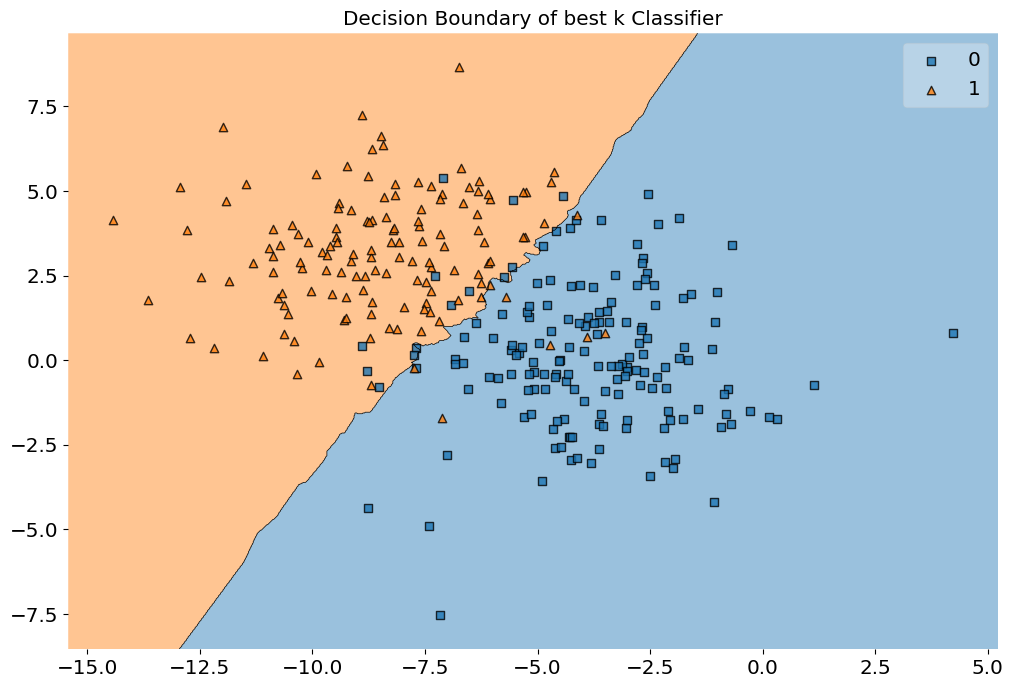

In [11]:
# add your code below
plt.figure()
plot_decision_regions(X_train, y_train, clf=kmax_classifier)
plt.title('Decision Boundary of best k Classifier')
plt.show()

According to these results, we can find that the decision boundary is smoother.

# 1.11

Change the toy dataset (number of classes, number of observations, cluster spread) and repeat the above. What happens as the cluster spread increase? What happens if there are more classes?

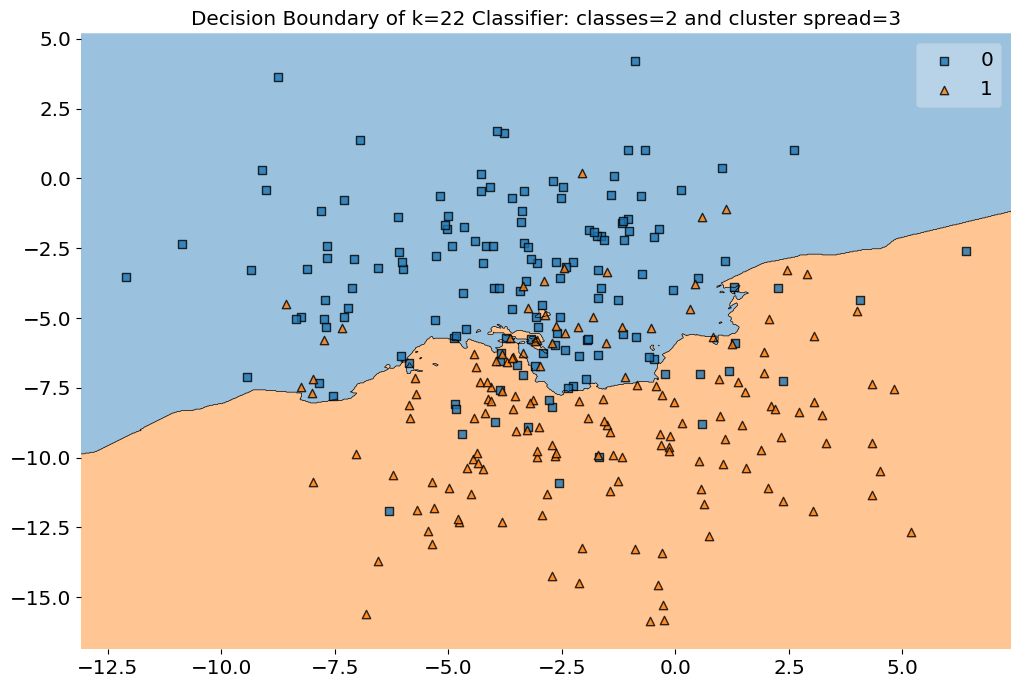

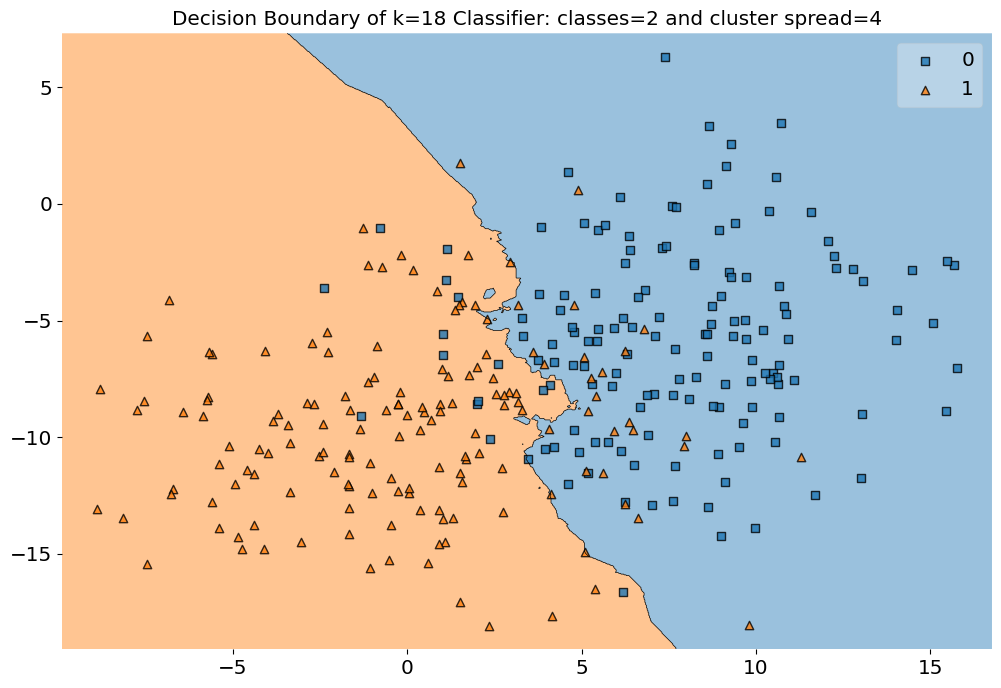

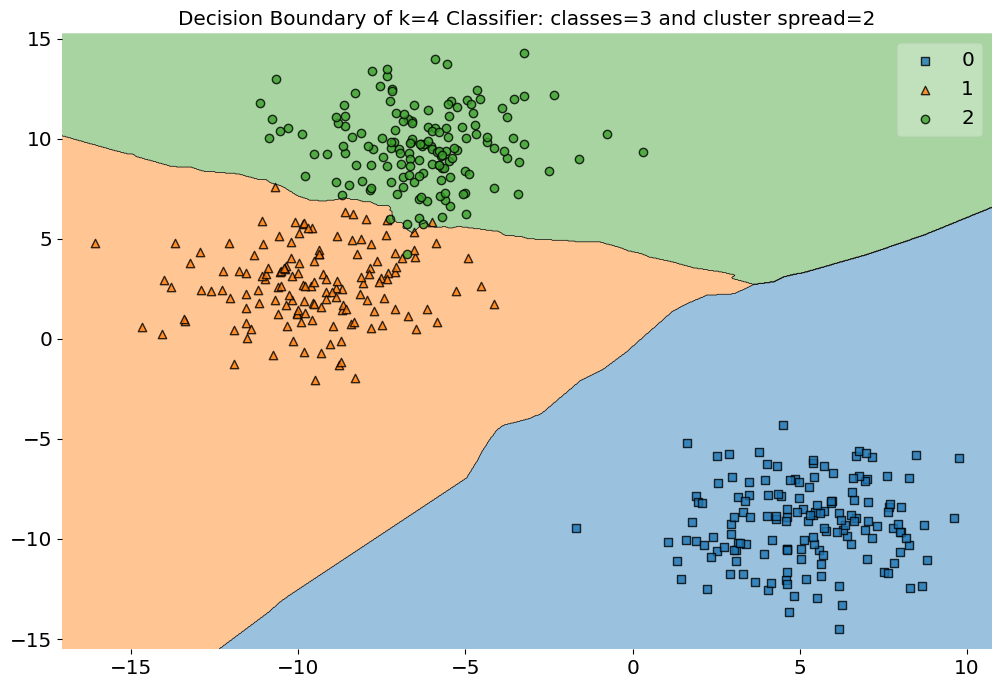

C:\Users\fengletao\anaconda3\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


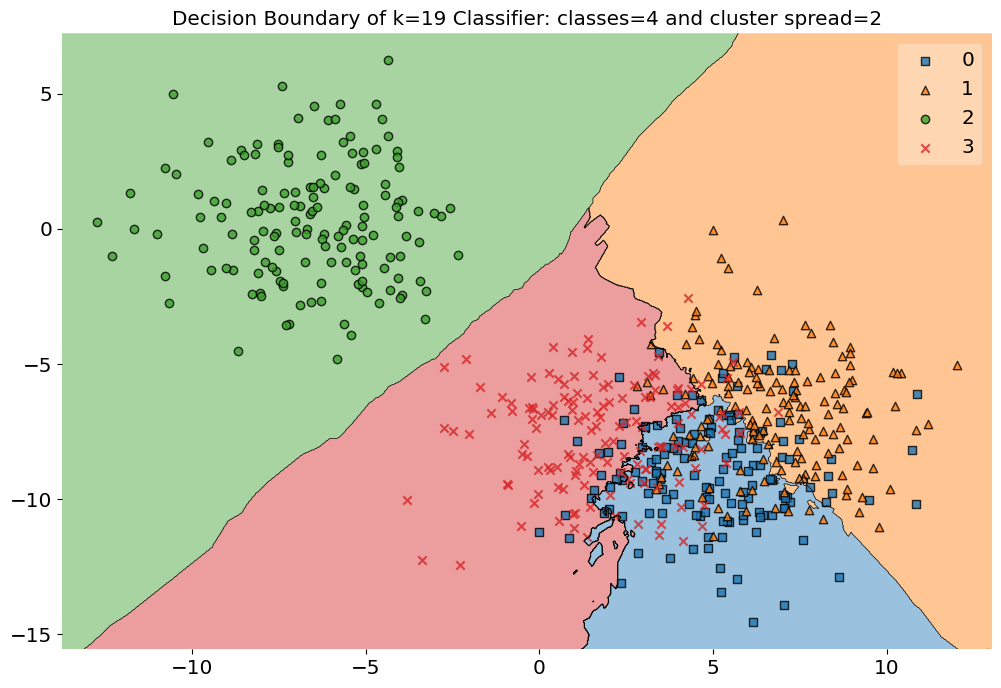

In [12]:
# add your code below
def toy_dataset(n_classes, cluster):
    #number of classes, number of observations, cluster spread
    numClasses = n_classes
    numObservations = numClasses*300
    cluster_std = cluster
    
    #create datasets
    X,y = datasets.make_blobs(numObservations,centers=numClasses,cluster_std=cluster_std)
    X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.5, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test1, y_test1, test_size=0.40, random_state=42)

    train_acc = []
    val_acc = []
    k_neigh = list(range(1, 52, 2))
    
    for k in k_neigh:
        k_classifier = KNeighborsClassifier(k)
        k_classifier.fit(X_train, y_train) #train
    
        train_acc.append(k_classifier.score(X_train, y_train))
        val_acc.append(k_classifier.score(X_val, y_val))

    k_max = np.argwhere(val_acc == np.max(val_acc)).ravel()[-1]
    #print(k_max,val_acc[k_max],np.max(val_acc))
    
    kmax_classifier = KNeighborsClassifier(k_max) 
    kmax_classifier.fit(X_train, y_train)

    plt.figure()
    plot_decision_regions(X_train, y_train, clf=kmax_classifier)
    plt.title('Decision Boundary of k={} Classifier: classes={} and cluster spread={}'.format(k_max, numClasses, cluster_std))
    plt.show()
        
toy_dataset(n_classes = 2, cluster = 3)
toy_dataset(n_classes = 2, cluster = 4)
toy_dataset(n_classes = 3, cluster = 2)
toy_dataset(n_classes = 4, cluster = 2)

When the cluster spread increases, the boundaries are getting less smooth. When the number of classes increases, the decision boundaries are getting more and more complex. And the classification task will be more difficult.

# Part 2: Application

In this portion of the lab, you will work with audio recordings of two music genres: *Kiki* and *Bouba*. These genres are popular amongst some of the beings that inhabit the digital world. Download the zipfile from the Canvas lab 02 page, unzip, and put them somewhere you can find them. 

Below are two functions we will use to extract features from the audio data.

In [1]:
def extractZC( data, windowsizeinsamples, windowhopinsamples ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  numbersignchanges = []
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowhopinsamples)
    datasign = np.sign(data[windowstart:windowend])
    datasignderivative = datasign - np.roll(datasign,1)
    numbersignchanges.append(np.count_nonzero(datasignderivative[1:-1]))
  return np.array(numbersignchanges)

def extractSC( data, windowsizeinsamples, windowhopinsamples, samplerate ):
  totalnumberofwindows = np.floor((len(data)-windowsizeinsamples)/windowhopinsamples)
  centroid = []
  freqs = np.arange(np.ceil(windowsizeinsamples/2.0)+1)*samplerate/windowsizeinsamples
  for ii in np.arange(totalnumberofwindows):
    windowstart = int(ii*windowhopinsamples)
    windowend = int(windowstart + windowsizeinsamples)
    DATA = np.abs(np.fft.fft(data[windowstart:windowend]))
    centroid.append(np.sum(freqs*DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)])/
                    np.sum(DATA[:int(np.ceil(windowsizeinsamples/2.0)+1)]))
  return np.array(centroid)

# 2.1 

Using the functions above, compute zero crossing and spectral centroid features for all kiki and bouba training data files using contiguous 100 ms frames. (Ignore any frames at the end of audio files that are less than that length.) Create a two-dimensional scatter plot of the features extracted from the training data. Below is what my scatter plot looks like, just so you know.

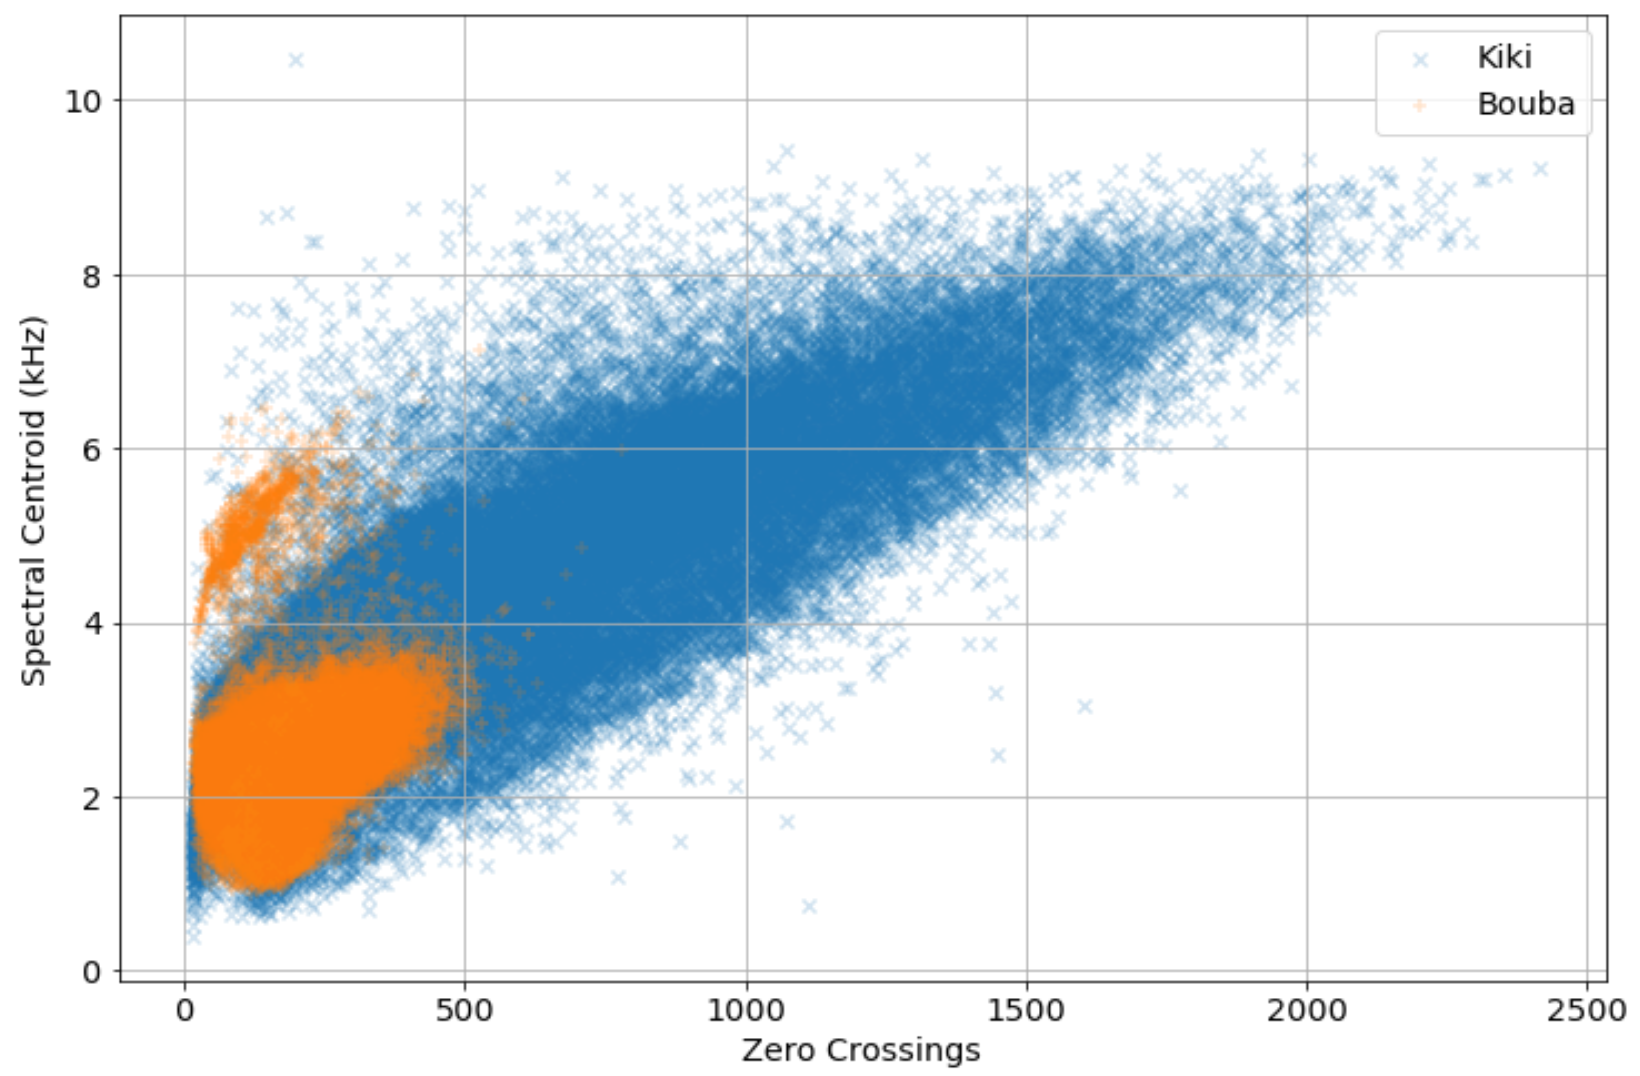

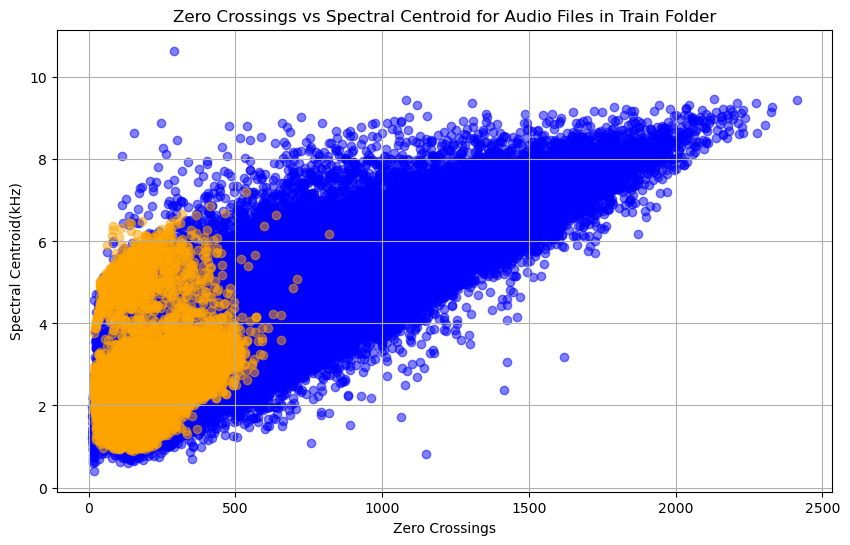

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
from pydub import AudioSegment

window_duration_ms = 100
windowhop_ms = 100

# 加载音频文件的函数
def load_audio(filename):
    audio = AudioSegment.from_file(filename)
    data = np.array(audio.get_array_of_samples())
    samplerate = audio.frame_rate
    return data, samplerate

# 遍历文件夹中所有的音频文件并提取特征
def extract_features_from_folder(folder_path):
    zc_features = []
    sc_features = []
    file_count = 0

    for filename in os.listdir(folder_path):
        if filename.endswith('.mp3'): 
            file_count += 1
            filepath = os.path.join(folder_path, filename)
            data, samplerate = load_audio(filepath)

            # 将毫秒转换为采样数
            windowsize = int(window_duration_ms * samplerate / 1000)
            windowhop = int(windowhop_ms * samplerate / 1000)

            # 提取零交叉率和频谱质心特征
            zc = extractZC(data, windowsize, windowhop)
            sc = extractSC(data, windowsize, windowhop, samplerate)

            zc_features.extend(zc)
            sc_features.extend(sc)

    return np.array(zc_features), np.array(sc_features), file_count

# 提取训练数据的特征
zc_features1, sc_features1, file_count1 = extract_features_from_folder("./Data-1/kikibouba_train/kiki/")
zc_features2, sc_features2, file_count2 = extract_features_from_folder("./Data-1/kikibouba_train/bouba/")

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(zc_features1, sc_features1/1000, color='blue', alpha=0.5)
plt.scatter(zc_features2, sc_features2/1000, color='orange', alpha=0.5)

plt.title('Zero Crossings vs Spectral Centroid for Audio Files in Train Folder')
plt.xlabel('Zero Crossings')
plt.ylabel('Spectral Centroid(kHz)')

plt.grid(True)
plt.show()

# 2.2 

Create and plot histograms of the zero crossings feature and the spectral centroid feature for the class kiki. Use 50 bins. Do the same for bouba. Normalize each histogram by setting the parameter "density=True" in either [pandas.DataFrame.hist](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) or [matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

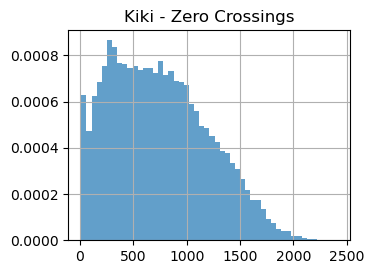

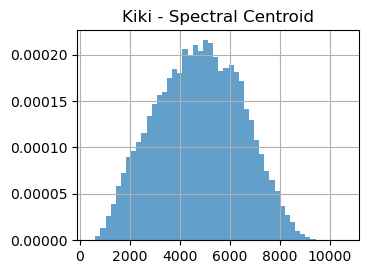

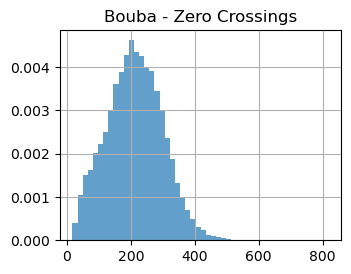

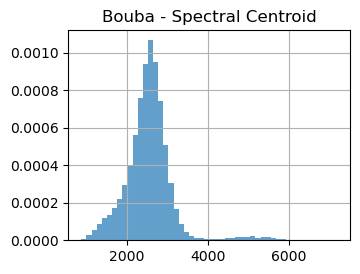

In [26]:
# add your code below
def plot_histogram(feature, title, n):
    plt.figure(figsize=(8, 6))
    plt.subplot(2,2,n)
    plt.hist(feature, bins=50, density=True, alpha=0.7) 
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_histogram(zc_features1, 'Kiki - Zero Crossings', 1)
plot_histogram(sc_features1, 'Kiki - Spectral Centroid', 2)
plot_histogram(zc_features2, 'Bouba - Zero Crossings', 3)
plot_histogram(sc_features2, 'Bouba - Spectral Centroid', 4)

# 2.3 

Let's model *each* feature of the *each* class by a Gausssian distribution.
This means we want to approximate each histogram of each feature observed in class $g$ by a Gaussian function with mean $\mu_{*,g}$ and variance $\sigma_{*,g}^2$:
$$f_{X|G}(x|g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x-\mu_{*,g})^2/2\sigma_{*,g}^2\right ]$$

Use unbiased maximum likelihood estimation (MLE) to compute the parameters of the two distributions using your training observations. Remember, the MLE mean of $N$ numbers $\{x_1, x_2, \ldots, x_N\}$ is given by $$\hat\mu = \frac{1}{N}\sum_{n=1}^N x_n$$ and the MLE variance is given by $$\sigma^2 = \frac{1}{N-1}\sum_{n=1}^N (x_n-\hat\mu)^2.$$

Plot these four distributions, overlayed on the normalized histograms of the features for the two classes.

Here's what mine look like:
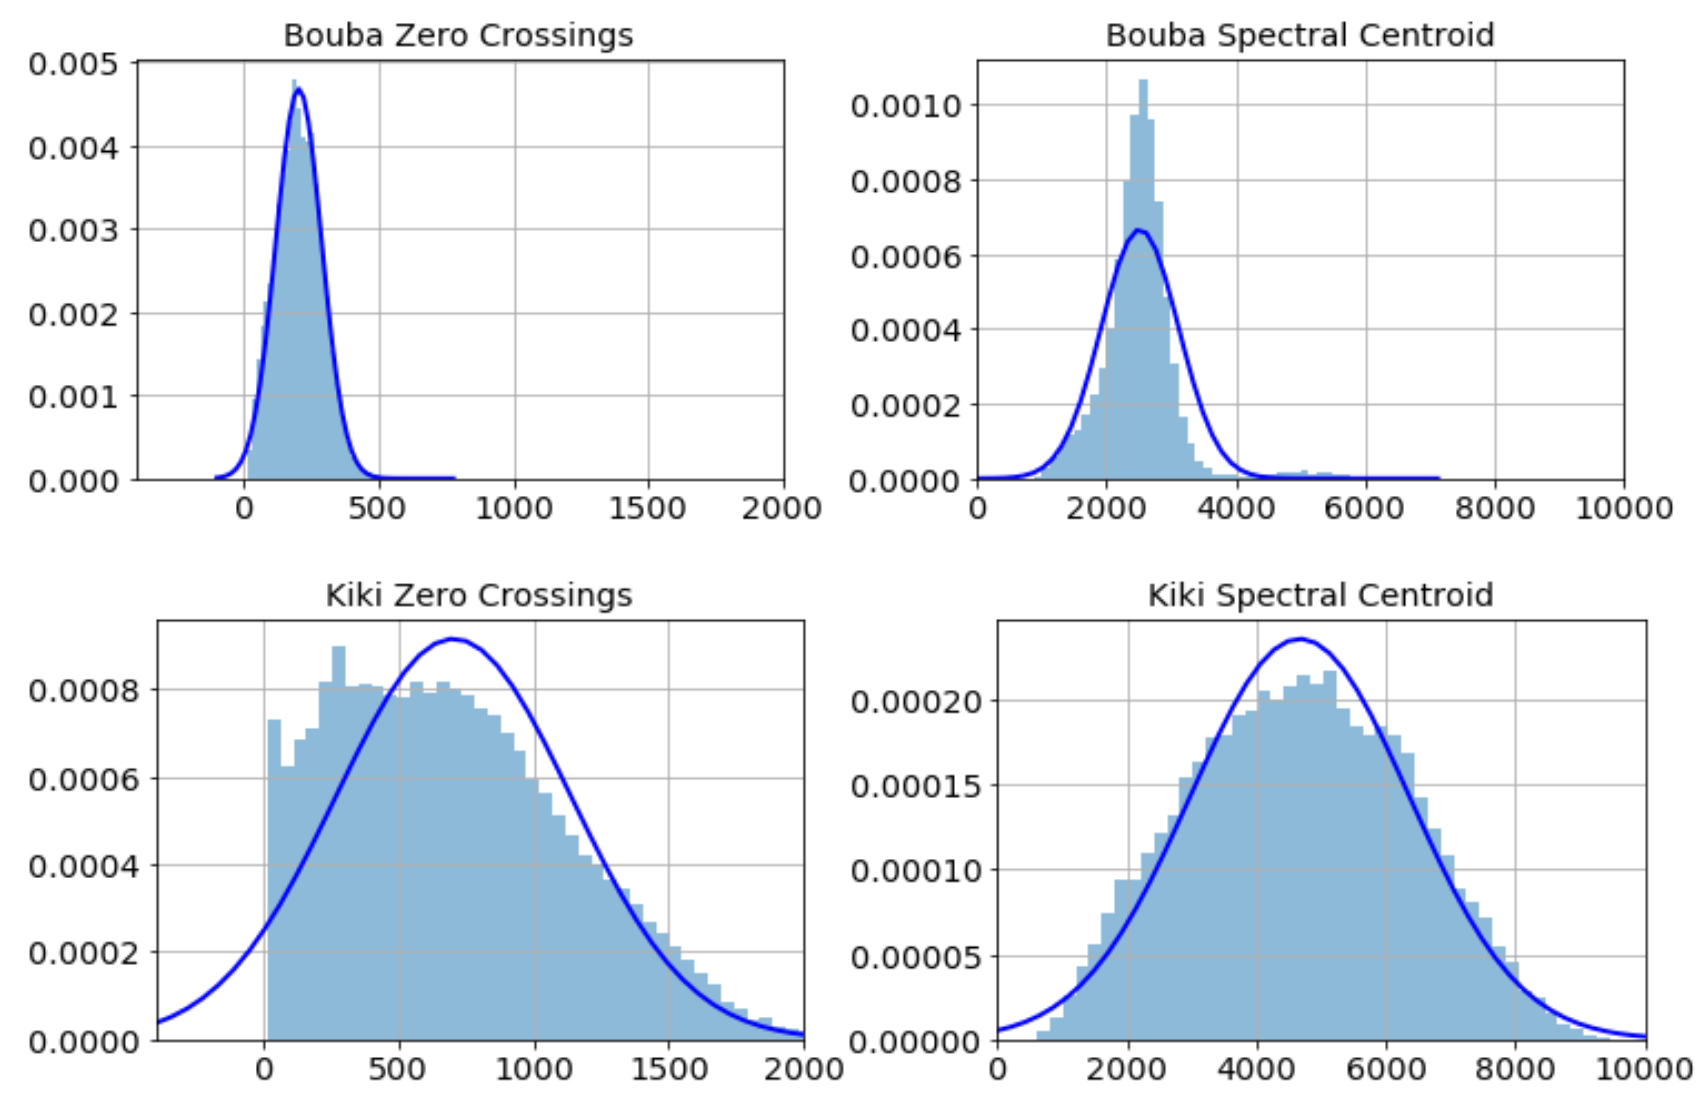

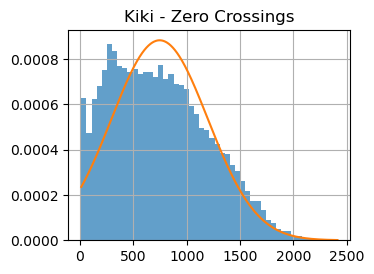

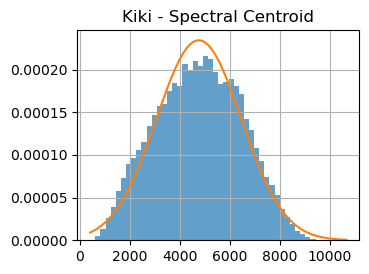

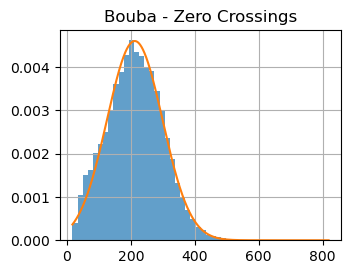

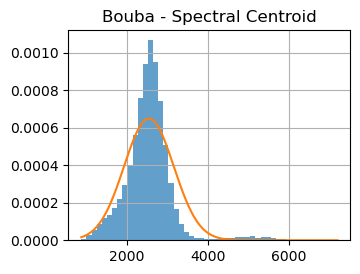

In [28]:
from scipy.stats import norm

# add your code below
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram_with_gaussian(feature_data, title, n):
    
    mu = np.mean(feature_data)  # 均值
    sigma_squared = np.var(feature_data, ddof=1)  # 方差，无偏估计 (ddof=1)
    sigma = np.sqrt(sigma_squared)  # 标准差
    
    # 绘制归一化直方图
    plt.figure(figsize=(8, 6))
    plt.subplot(2,2,n)
    count, bins, ignored = plt.hist(feature_data, bins=50, density=True, alpha=0.7)
    
    # 生成高斯分布的 PDF 曲线
    x_range = np.linspace(min(bins), max(bins), 1000)
    gaussian_pdf = norm.pdf(x_range, mu, sigma)
    
    # 绘制高斯分布曲线
    plt.plot(x_range, gaussian_pdf)
    plt.title(title)
    plt.grid(True)
    plt.show()

# 为kiki和bouba分别绘制零交叉率和频谱质心特征的归一化直方图并叠加高斯分布
plot_histogram_with_gaussian(zc_features1, 'Kiki - Zero Crossings', 1)
plot_histogram_with_gaussian(sc_features1, 'Kiki - Spectral Centroid', 2)

plot_histogram_with_gaussian(zc_features2, 'Bouba - Zero Crossings', 3)
plot_histogram_with_gaussian(sc_features2, 'Bouba - Spectral Centroid', 4)


# 2.4

Given a particular two-dimensional observation $\mathbf{x}$ extracted from an audio file, we want to estimate the probaility of $\mathbf{x}$ coming from class $g \in \{\textrm{Kiki},\textrm{Bouba}\}$, i.e., the *posterior* $P[g|\mathbf{x}]$.
By Bayes' Theorem, we can express this probability as:

$$P[G=g|\mathbf{x}] = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=g)P[G=g]}{f_\mathbf{X}(\mathbf{x})}$$

where the *likelihood* $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$ is the probability density of observing $\mathbf{x}$ from class $g$, $P[G=g]$ is the *prior* probability of encountering $g$ regardless of what we observe, and $f_\mathbf{X}(\mathbf{x})$ is the probability density of observing $\mathbf{x}$ no matter what class.

We define the *posterior odds* of Kiki as the ratio:
$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{P[G=\textrm{Kiki}|\mathbf{x}]}{P[G=\textrm{Bouba}|\mathbf{x}]}$$
Similarly, the posterior odds of Bouba is the ratio 
$$O(G=\textrm{Bouba}|\mathbf{x}) = \frac{P[G=\textrm{Bouba}|\mathbf{x}]}{P[G=\textrm{Kiki}|\mathbf{x}]} =\frac{1}{O(G=\textrm{Kiki}|\mathbf{x})}.$$

These are easy to understand. For instance, if $O(G=\textrm{Kiki}|\mathbf{x}) = 1$, then according to our model Kiki is as likely given $\mathbf{x}$ as Bouba. By plugging in the equation for $P[G=g|\mathbf{x}]$, the odds of Kiki can be expressed

$$O(G=\textrm{Kiki}|\mathbf{x}) = \frac{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Kiki})}{f_{\mathbf{X}|G}(\mathbf{x}|G=\textrm{Bouba})}\frac{P[G=\textrm{Kiki}]}{P[G=\textrm{Bouba}]}$$

So the posterior odds of Kiki is just the product of the ratio of posterior probability densities and prior probabilities.

If for an observation $O(G=\textrm{Kiki}|\mathbf{x}) > 1$, then we might label it as Kiki. Otherwise we could label it Bouba.
We just need to compute the densities $f_{\mathbf{X}|G}(\mathbf{x}|G=g)$.

This is where our Gaussian models come into play.
We know the first element of $\mathbf{x}$ is the zero crossing feature, and the second element is spectral centroid. If we assume these two features are independent, then:

$$f_{\mathbf{X}|G}(x_z,x_s|G=g) = f_{X_z|G}(x_z|G=g)f_{X_s|G}(x_s|G=g)$$

where $x_z$ is the zero crossing feature, and $x_s$ is the spectral centroid features.
If we assume each feature is distributed Gaussian, then

$$f_{X_*|G}(x_*|G=g) = \frac{1}{\sqrt{2\pi \sigma_{*,g}^2}} \exp\left [-(x_*-\mu_{*,g})^2/2\sigma_{*,g}^2\right ].$$

Given our estimates of these four parameters $\{\mu_{z,g},\sigma_{z,g}^2,\mu_{s,g},\sigma_{s,g}^2\}$ for Kiki and for Bouba, we are *almost* ready to build a classification system.

We need to estimate the prior probabilities, $P[G=\textrm{Kiki}]$ and $P[G=\textrm{Bouba}]$.

To do that, assume the training data reflects how observations are distributed in the real world, and estimate $P[G=\textrm{Kiki}]$ as the proportion of observations of Kiki in the training dataset, and $P[G=\textrm{Bouba}]$ as the proportion of observations of Bouba in the training dataset.

In [29]:
# add your code below
total_number = file_count1 + file_count2
p_kiki = file_count1 / total_number
p_bonba = file_count2 / total_number

print("The prior probability of kiki is:", p_kiki)
print("The prior probability of bonba is:", p_bonba)


The prior probability of kiki is: 0.5
The prior probability of bonba is: 0.5


# 2.5

Now write a function using all the parameters you have estimated that computes the posterior odds of Kiki given a two-dimensional observation, and returns 1 (Kiki) if the odds are greater than 1, and otherwise 0 (Bouba). Use the MLE parameters you found in the previous part.

In [30]:
# add your code below
import numpy as np

def get_parameter(feature_data_zc, feature_data_sc):
    mu_zc = np.mean(feature_data_zc)  # 均值
    sigma_zc_squared = np.var(feature_data_zc)  # 方差，无偏估计 (ddof=1)
    sigma_zc = np.sqrt(sigma_zc_squared)  # 标准差
    
    mu_sc = np.mean(feature_data_sc)  # 均值
    sigma_sc_squared = np.var(feature_data_sc)  # 方差，无偏估计 (ddof=1)
    sigma_sc = np.sqrt(sigma_sc_squared)  # 标准差
    
    return mu_zc, sigma_zc, mu_sc, sigma_sc

def get_gaussian_pdf(feature_data_zc, feature_data_sc, para):

    mu_zc, sigma_zc, mu_sc, sigma_sc = para
    
    gaussian_pdf_zc = (1 / np.sqrt(2 * np.pi * sigma_zc**2)) * np.exp(-(feature_data_zc - mu_zc)**2 / (2 * sigma_zc**2))
    gaussian_pdf_sc = (1 / np.sqrt(2 * np.pi * sigma_sc**2)) * np.exp(-(feature_data_sc - mu_sc)**2 / (2 * sigma_sc**2))

    gaussian_pdf = gaussian_pdf_zc * gaussian_pdf_sc

    return gaussian_pdf

def calculate_odds_kiki(x_z, x_s):
    kiki_para = get_parameter(zc_features1, sc_features1)
    bonba_para = get_parameter(zc_features2, sc_features2)

    f_x_given_kiki = get_gaussian_pdf(x_z, x_s, kiki_para)
    f_x_given_bonba = get_gaussian_pdf(x_z, x_s, bonba_para)
    
    odds_kiki = (f_x_given_kiki / f_x_given_bonba) * (p_kiki / p_bonba)

    if odds_kiki > 1:
        return 1, odds_kiki
    else:
        return 0, odds_kiki

# 2.6 

Use your function to label all observations in the training data and create one scatter plot of the labeled Kiki observations, and one scatter plot of the labeled Bouba observations, both color-coded by the predicted labels. (This should take some time to compute because the classifier you have created is not very optimized.)

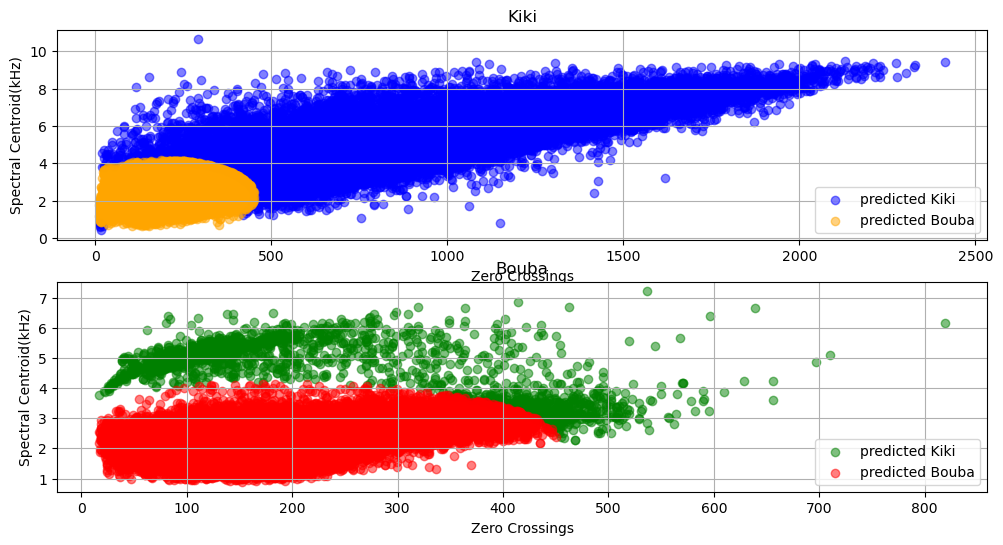

In [31]:
import numpy as np
import matplotlib.pyplot as plt

kiki_labels = []
kiki_labels_true = []
for i in range(len(zc_features1)):
    x_z = zc_features1[i]
    x_s = sc_features1[i]
    label, _ = calculate_odds_kiki(x_z, x_s)
    kiki_labels.append(label)
    kiki_labels_true.append(1)

bouba_labels = []
bonba_labels_true = []
for i in range(len(zc_features2)):
    x_z = zc_features2[i]
    x_s = sc_features2[i]
    label, _ = calculate_odds_kiki(x_z, x_s)
    bouba_labels.append(label)
    bonba_labels_true.append(0)

kiki_labels = np.array(kiki_labels)
bouba_labels = np.array(bouba_labels)


plt.figure(figsize=(12, 6))

# Kiki 样本
plt.subplot(2, 1, 1)
plt.scatter(zc_features1[kiki_labels == 1], sc_features1[kiki_labels == 1]/1000, color='blue', alpha=0.5, label='predicted Kiki')
plt.scatter(zc_features1[kiki_labels == 0], sc_features1[kiki_labels == 0]/1000, color='orange', alpha=0.5, label='predicted Bouba')
plt.title('Kiki')
plt.xlabel('Zero Crossings')
plt.ylabel('Spectral Centroid(kHz)')
plt.legend()
plt.grid(True)

# Bouba 样本
plt.subplot(2, 1, 2)
plt.scatter(zc_features2[bouba_labels == 1], sc_features2[bouba_labels == 1]/1000, color='green', alpha=0.5, label='predicted Kiki')
plt.scatter(zc_features2[bouba_labels == 0], sc_features2[bouba_labels == 0]/1000, color='red', alpha=0.5, label='predicted Bouba')
plt.title('Bouba')
plt.xlabel('Zero Crossings')
plt.ylabel('Spectral Centroid(kHz)')
plt.legend()
plt.grid(True)
plt.show()


# 2.7

Explain what you see, and how it compares to the scatter plot you created in #2.1.

Compared to the scatter plot we created in 2.1, the boudary between two classes is too clear. For Kiki, there are no Bouba instances out of the main cluster and vice versa. As a result, the classifier may have some problems.

# 2.8 
Compute a confusion table summarizing the results of your classifier on the training dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes.

In [32]:
# add your code below
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score

true_labels = np.concatenate([kiki_labels_true, bonba_labels_true])
predicted_labels = np.concatenate([kiki_labels, bouba_labels])

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# balanced_accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced Accuracy:", balanced_acc)

# precision
precision_kiki = precision_score(true_labels, predicted_labels)
precision_bouba = precision_score(true_labels, predicted_labels, pos_label=0)
print(f"Precision (Kiki): {precision_kiki}")
print(f"Precision (Bouba): {precision_bouba}")

# recall
recall_kiki = recall_score(true_labels, predicted_labels)
recall_bouba = recall_score(true_labels, predicted_labels, pos_label=0)
print(f"Recall (Kiki): {recall_kiki}")
print(f"Recall (Bouba): {recall_bouba}")


Confusion Matrix:
 [[51491  1894]
 [10295 35715]]
Accuracy: 0.8773680768650335
Balanced Accuracy: 0.8703830820787601
Precision (Kiki): 0.9496397138982691
Precision (Bouba): 0.8333764930566795
Recall (Kiki): 0.7762442947185394
Recall (Bouba): 0.964521869438981


# 2.9 

Use your function to label all observations in the testing dataset. Compute a confusion table summarizing the results of your classifier on the testing dataset. Compute the accuracy and balanced accuracy. Compute the precision and recall for both classes. Compare with the results on the training dataset.

In [33]:
# add your code below
zc_features1, sc_features1, file_count1 = extract_features_from_folder("./Data-1/kikibouba_test/kiki/")
zc_features2, sc_features2, file_count2 = extract_features_from_folder("./Data-1/kikibouba_test/bouba/")

total_number = file_count1 + file_count2
p_kiki = file_count1 / total_number
p_bonba = file_count2 / total_number

kiki_labels = []
for i in range(len(zc_features1)):
    x_z = zc_features1[i]
    x_s = sc_features1[i]
    label, _ = calculate_odds_kiki(x_z, x_s)
    kiki_labels.append(label)

bouba_labels = []
for i in range(len(zc_features2)):
    x_z = zc_features2[i]
    x_s = sc_features2[i]
    label, _ = calculate_odds_kiki(x_z, x_s)
    bouba_labels.append(label)

kiki_labels = np.array(kiki_labels)
bouba_labels = np.array(bouba_labels)

In [34]:
# add your code below
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, precision_score, recall_score

true_labels_kiki = np.ones(len(kiki_labels))
true_labels_bouba = np.zeros(len(bouba_labels))
true_labels = np.concatenate([true_labels_kiki, true_labels_bouba])
predicted_labels = np.concatenate([kiki_labels, bouba_labels])

# confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy)

# balanced_accuracy
balanced_acc = balanced_accuracy_score(true_labels, predicted_labels)
print("Balanced Accuracy:", balanced_acc)

# precision
precision_kiki = precision_score(true_labels, predicted_labels)
precision_bouba = precision_score(true_labels, predicted_labels, pos_label=0)
print(f"Precision (Kiki): {precision_kiki}")
print(f"Precision (Bouba): {precision_bouba}")

# recall
recall_kiki = recall_score(true_labels, predicted_labels)
recall_bouba = recall_score(true_labels, predicted_labels, pos_label=0)
print(f"Recall (Kiki): {recall_kiki}")
print(f"Recall (Bouba): {recall_bouba}")


Confusion Matrix:
 [[52808  1992]
 [10609 35032]]
Accuracy: 0.8745432642048566
Balanced Accuracy: 0.8656025612136098
Precision (Kiki): 0.9461970613656007
Precision (Bouba): 0.8327104719554693
Recall (Kiki): 0.7675554873907232
Recall (Bouba): 0.9636496350364964


The classifier's performance on both the training and test datasets is very similar, with accuracy scores of 87.74% and 87.45%, and balanced accuracy scores of 87% and 86.60%, respectively. This result shows that the model has strong generalization. In summary, the classifier performs well across both classes without signs of significant overfitting.

# 2.10

Discuss some ways you might build a better Kiki-Bouba classifier.

Firstly, we can add more features. Besides zero-crossings and spectral centroid, other audio features could be helpful. For example, Mel-frequency cepstral coefficients (MFCCs), spectral flux, spectral roll-off, and root mean square (RMS) energy could capture more nuanced differences between Kiki and Bouba sounds. Besides, we can apply techniques like Principal Component Analysis (PCA) or Lasso Regression. These methods can reduce noise in the data by focusing on the most relevant features for classification.
Moreover, we can choose non-Gaussian models. The current model assumes features follow a Gaussian distribution, which may not always be accurate. Using non-parametric density estimation methods like k-Nearest Neighbors (k-NN) or Kernel Density Estimation (KDE) could provide a more flexible way of estimating likelihoods. Or consider the multivariate Gaussian distribution.